In [1]:
%matplotlib inline
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn import preprocessing
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from dataset_manager import *
from predict import *
from trame_show import *
from datetime import date, datetime
from termcolor import colored
import random


train_dataset, test_dataset = get_dataset()
shift_letter(train_dataset, test_dataset)
ctrl_alt_suppr(train_dataset, test_dataset)
d_list = list(test_dataset)

#train_dataset, test_dataset = filtre(train_dataset, test_dataset, 0.3)

X_train, Y_train = get_X_Y_vectorized_int(train_dataset)
X_test, Y_test = get_X_Y_vectorized_int(test_dataset)

X_train, Y_train = shuffle_X_Y(X_train, Y_train)
X_test, Y_test = shuffle_X_Y(X_test, Y_test)

#X_login_mdp, _ = get_pics_from_file(f"../tohack/pics_LOGINMDP.bin")
#X_login_mdp_filtred = filtre_result(X_login_mdp, np.array(train_dataset.get('NOKEY')).mean(0), 0.3)

In [2]:
def train_model(epochs, batch_size, couches_neu):
    """Réseau de neurones"""
    delta_time = datetime.now().time()
    model = Sequential()
    model.add(Dense(17))
    for _ in range(couches_neu):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(len(d_list)))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

    model.fit(np.array(X_train), np.array(Y_train), epochs=epochs, batch_size=batch_size, )
    
    test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test), verbose=3)

    accuracy = compute_accuracy_keras(model, d_list, X_test, Y_test)
    real_accu = sum(accuracy.values()) / len(d_list)
    
    return model, accuracy, real_accu

In [3]:
model, accuracy, real_accu = train_model(epochs=10, batch_size=60, couches_neu=6)

print("======\nAccuracy:")

for key, acc in accuracy.items():
    print(key, acc)
    
print("accuracy: ", real_accu)

Epoch 1/10
10838/10838 [==============================] - 30s 3ms/step - loss: 0.0140 - accuracy: 0.1031
Epoch 2/10
10838/10838 [==============================] - 30s 3ms/step - loss: 0.0087 - accuracy: 0.4664
Epoch 3/10
10838/10838 [==============================] - 30s 3ms/step - loss: 0.0078 - accuracy: 0.5164
Epoch 4/10
10838/10838 [==============================] - 29s 3ms/step - loss: 0.0075 - accuracy: 0.5348
Epoch 5/10
10838/10838 [==============================] - 29s 3ms/step - loss: 0.0074 - accuracy: 0.5438
Epoch 6/10
10838/10838 [==============================] - 29s 3ms/step - loss: 0.0073 - accuracy: 0.5494
Epoch 7/10
10838/10838 [==============================] - 29s 3ms/step - loss: 0.0072 - accuracy: 0.5515
Epoch 8/10
10838/10838 [==============================] - 29s 3ms/step - loss: 0.0072 - accuracy: 0.5557
Epoch 9/10
10838/10838 [==============================] - 30s 3ms/step - loss: 0.0071 - accuracy: 0.5598
Epoch 10/10
10838/10838 [==============================

In [4]:
trames_prediction = get_prediction_list_keras(model, d_list)
print(trames_prediction)

['NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'z', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'CTRL', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', '2', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 

['NOKEY', 'CTRL', 'e', 'y', '0', 'ALT', 'CTRL+ALT', 'ENTER', 'CTRL+ALT+SUPPR', 'SHIFT', 'L', 'K', 'n', 'A', 'l', 'k', 'o']


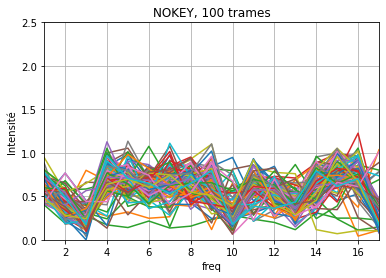

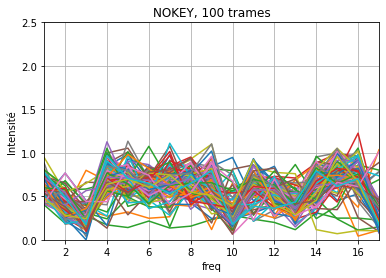

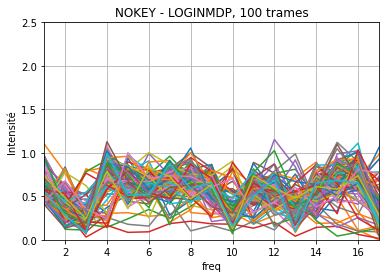

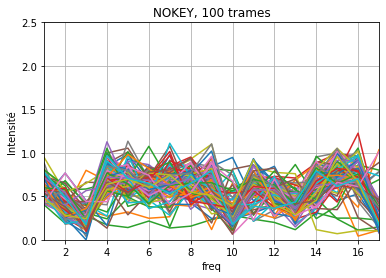

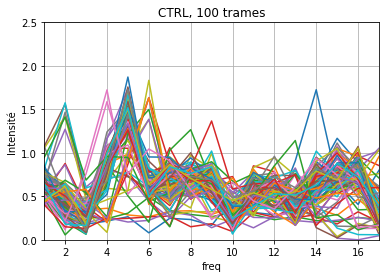

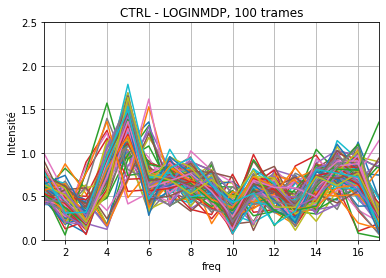

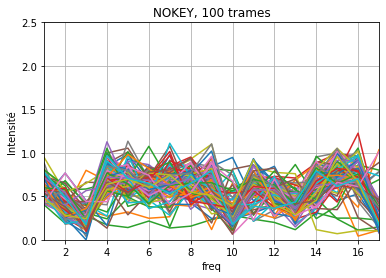

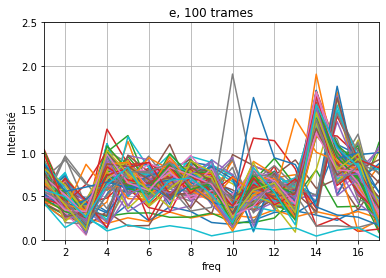

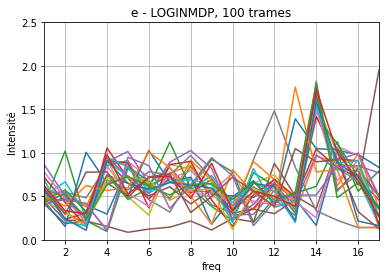

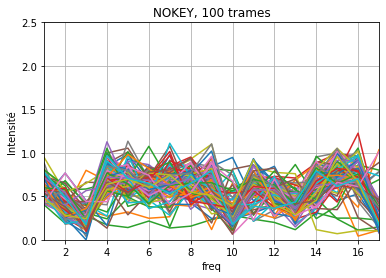

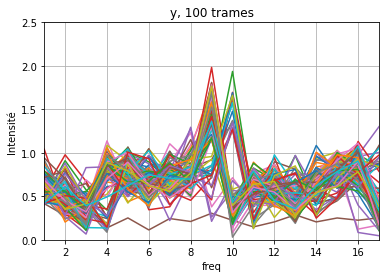

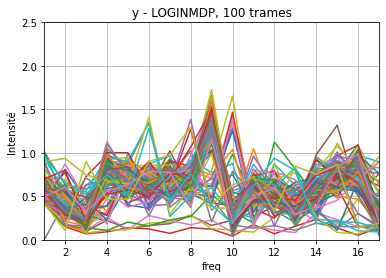

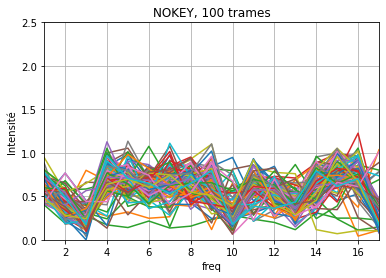

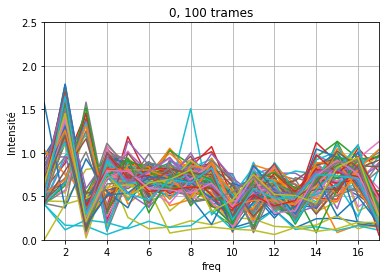

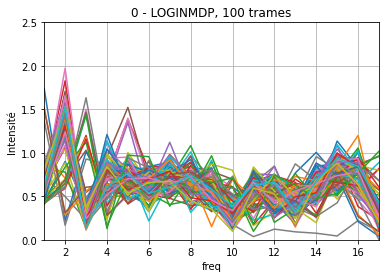

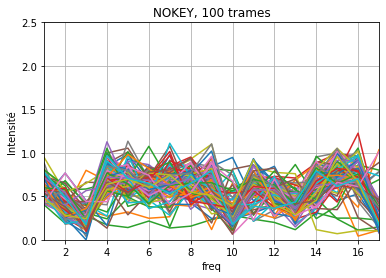

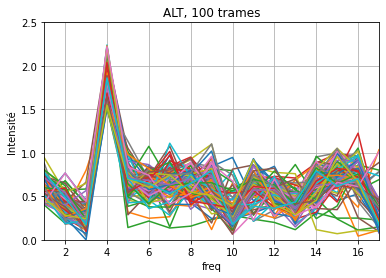

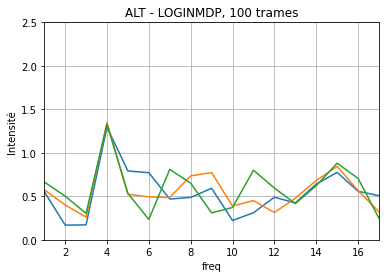

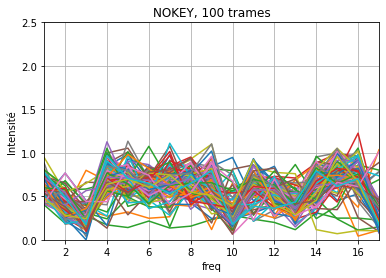

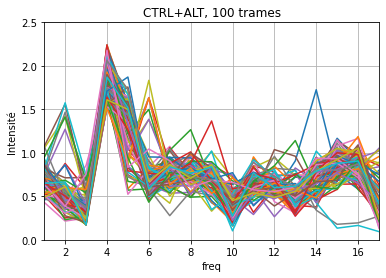

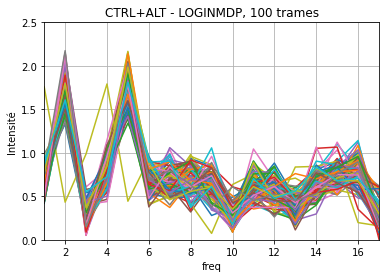

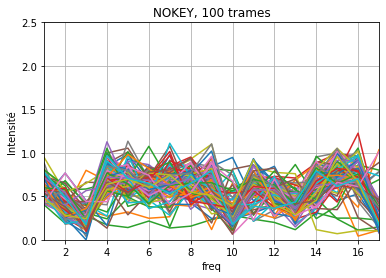

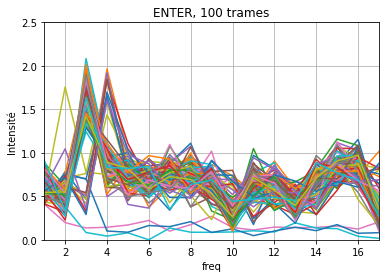

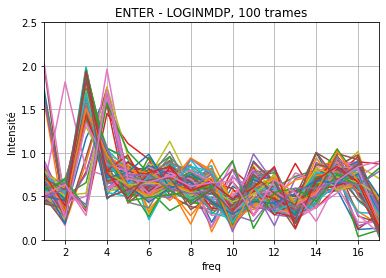

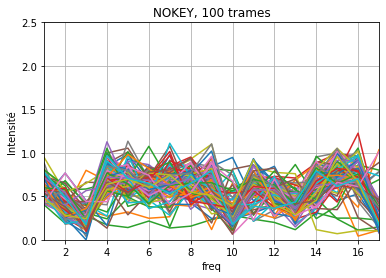

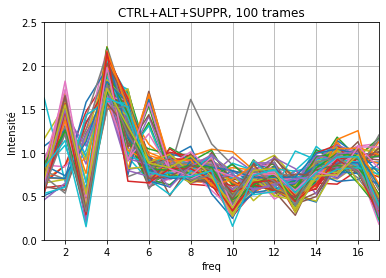

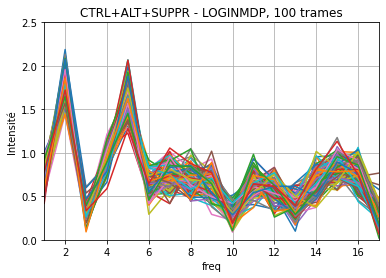

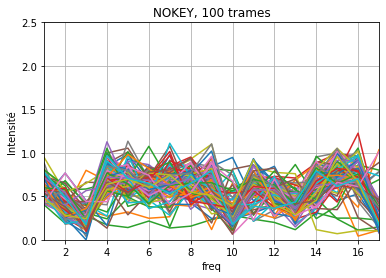

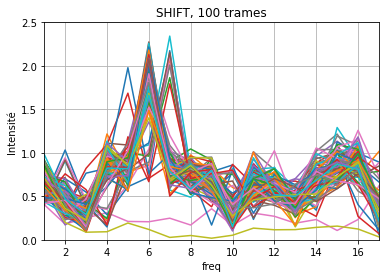

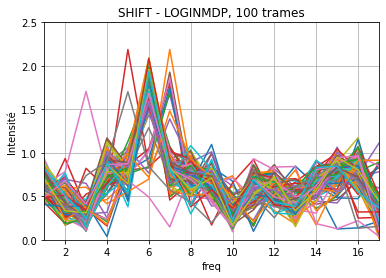

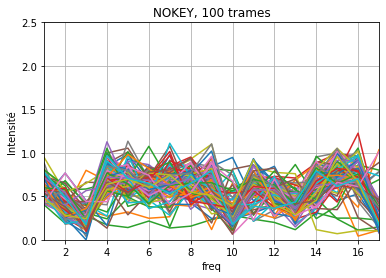

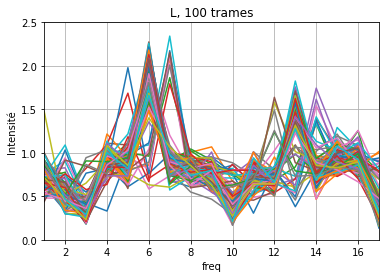

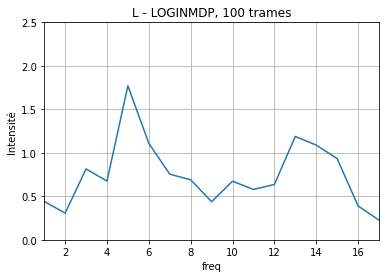

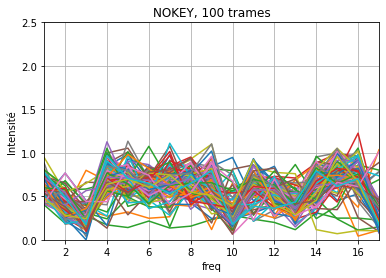

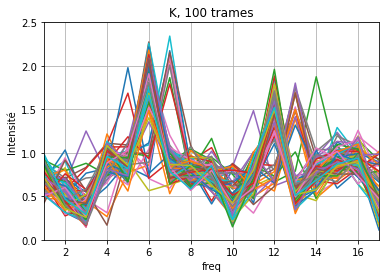

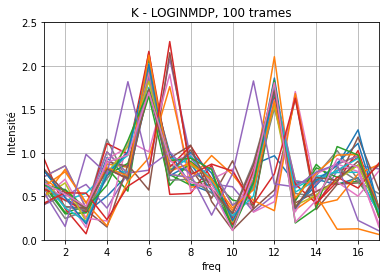

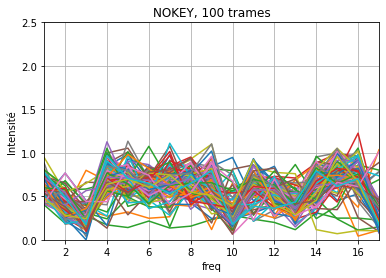

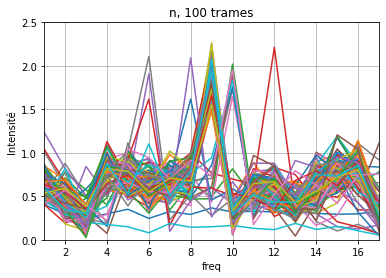

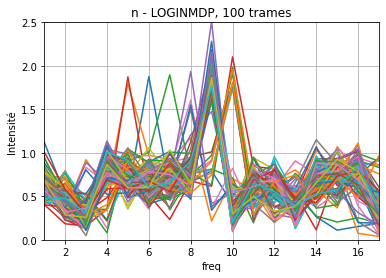

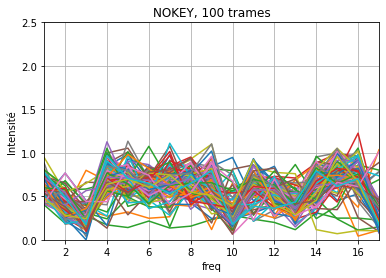

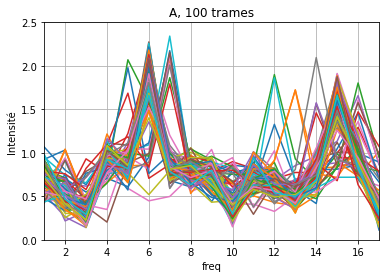

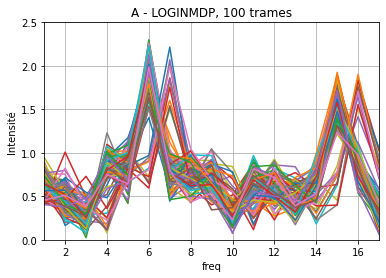

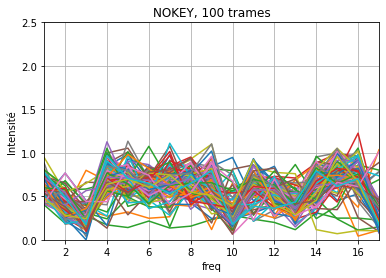

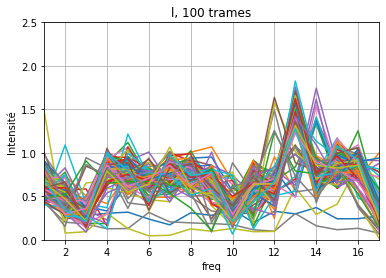

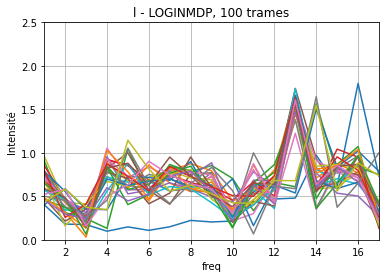

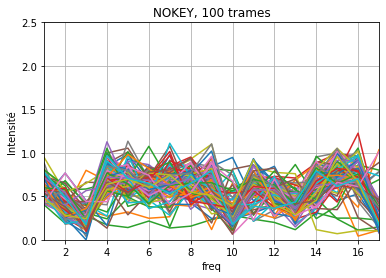

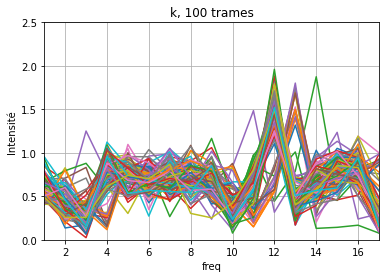

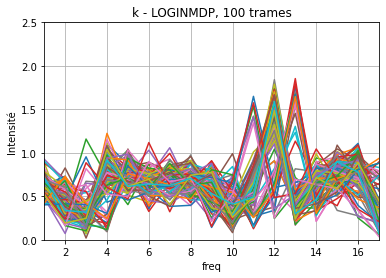

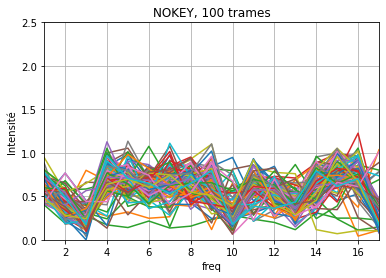

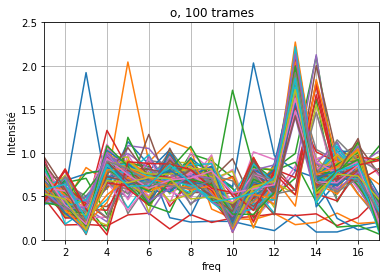

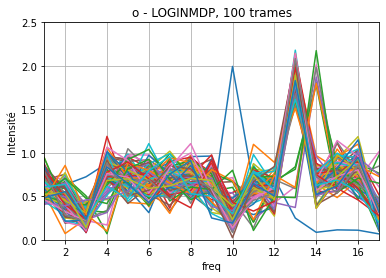

In [5]:
trame_show_result(train_dataset, accuracy, trames_prediction, 0.8)

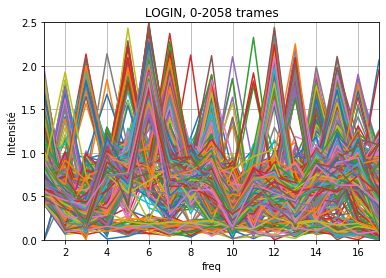

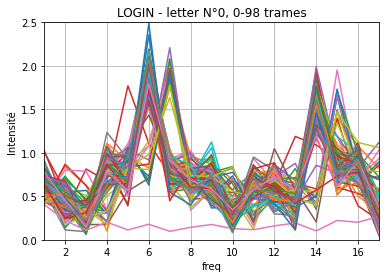

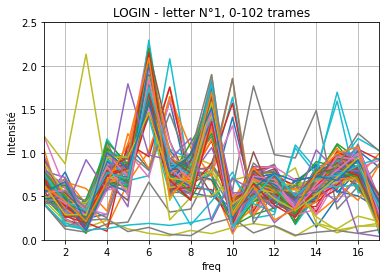

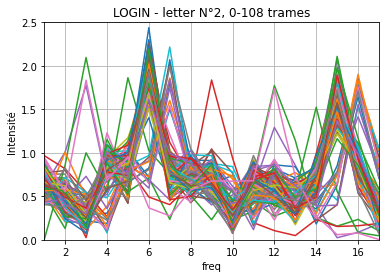

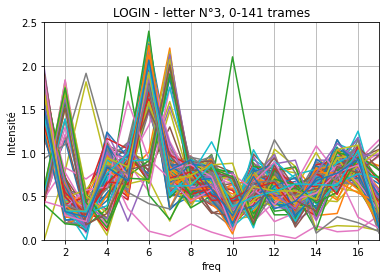

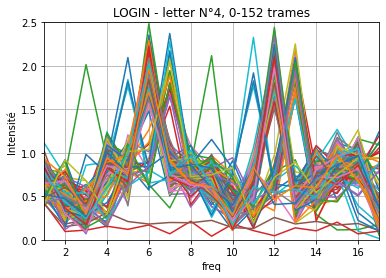

In [6]:
def find_start_sequence_index(arr, sub):
    start_seq, i_seq = None, 0
    for i_arr, e_arr in enumerate(arr):
        if not start_seq and sub[0] == e_arr:
            start_seq, i_seq = i_arr, 1
        elif start_seq and len(sub) <= i_seq:
            return start_seq
        elif start_seq and sub[i_seq] != e_arr:
            start_seq, i_seq = None, 0
        elif i_seq:
            i_seq += 1
    return start_seq

def trame_showw(X, key, figure_nbr):
    plt.figure()
    for i in X:
        plt.plot(range(1, len(i) + 1), i)
    
    plt.xlim(1, 17)
    plt.ylim(0, 2.5)
    plt.xlabel("freq")
    plt.ylabel("Intensité")
    plt.title("{0}, {1}-{2} trames".format(key, 0, figure_nbr))
    plt.grid()
    plt.show()

ctrl_alt_del_seq = (1481, 2147)
login_seq = (3011, 5069)
X_login_mdp, _ = get_pics_from_file("../tohack/pics_LOGINMDP.bin")
 
trame_showw(X_login_mdp[login_seq[0]:login_seq[1]], "LOGIN", login_seq[1] - login_seq[0])

letters = [
        (0, [
            'C', 'E', 'C', 'E', 'E', 'E', 'D', 'D', 'D', 'E', 'D', 'D', 'E', 'L', 'D', 'D', 'C', 'D', 'E', 'D', 'E', 'E', 'E', 'C', 'E', 'E', 'D', 'E', 'D', 'E', 'D', 'C', 'C', 'C', 'E', 'D', 'E', 'C', 'E', 'E', 'C', 'E', 'D', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'E', 'D', 'E', 'C', 'D', 'E', 'C', 'D', 'E', 'E', 'D', 'C', 'D', 'D', 'E', 'C', 'E', 'E', 'E', 'Q', 'E', 'D', 'K', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'NOKEY', 'E', 'E', 'C', 'E', 'E', 'D', 'SHIFT', 'SHIFT', 'C', 'E', 'E',
        ], 3224),
        (1, [
            'G', 'N', 'G', 'G', 'c', 'NOKEY', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'T', 'G', 'G', 'E', 'N', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'N', 'G', 'G', 'N', 'N', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'L', 'G', 'G', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'NOKEY', 'v', 'c', 'N', 'G', 'G', 'G', 'SHIFT', 'N', 'G', 'N', 'G', 'N', 'G', 'N', 'G', 'G', 'G', 'G', 'N', 'G', 'N', 'G', 'G', 'G', 'T', 'N', 'G'
        ], 3666),
        (2, [
            'Q', 'Q', 'W', 'W', 'A', 'A', 'Q', 'W', 'A', 'A', 'A', 'Q', 'W', 'Q', 'd', 'W', 'W', 'Q', 'Q', 'Q', 'A', 'W', 'W', 'Q', 'W', 'A', 'Q', 'Q', 'Q', 'Q', 'E', 'Q', 'A', 'W', 'A', 'W', 'W', 'W', 'A', 'W', 'SHIFT', 'Q', 'c', 'v', 'Q', 'Q', 'Q', 'A', 'Q', 'Q', 'Q', 'A', 'Q', 'A', 'A', 'SHIFT', 'Q', 'A', 'Q', 'A', 'A', 'Q', 'W', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'A', 'W', 'A', 'SHIFT', 'W', 'A', 'A', 'Q', 'Q', 'A', 'Q', 'W', 'A', 'W', 'Q', 'Q', 'A', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'W', 'A', 'SHIFT', 'A', 'W', 'SHIFT', 'A', 'Q', 'Q', 'A', 'SHIFT', 'W', 'A', 'Q', 'd', 'A', 
        ], 4034),    
        (3, [
            'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'w', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'R', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'P', 'm', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'SHIFT', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', '4', 'P', 'P', 'M', 'P', 'P', 'n', 'P', 'P', 'P', 'P', 'M', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'M', 'P', 'R', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'P', 'P', 'M', 'P', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'M', 'SHIFT', 'P', 
        ], 4423),
        (4, [
            'I', '4', 'NOKEY', 'I', 'K', 'I', 'I', 'K', 'K', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'K', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'K', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'J', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'NOKEY', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'K', 'I', 'NOKEY', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'SHIFT', 'SHIFT', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'SHIFT', 'U',
        ], 4824),
]


for i, seq , start_tmp in letters:
    start = find_start_sequence_index(trames_prediction, seq) or start_tmp 
    trame_showw(X_login_mdp[start: start + len(seq)], f"LOGIN - letter N°{i}", len(seq))

In [7]:
blocks_of_trames_prediction = create_blocks_of_trames_prediction(trames_prediction)
for b in blocks_of_trames_prediction:
    print(b)

('NOKEY', 0, 1479)
('CTRL', 1479, 1836)
('CTRL+ALT', 1836, 1915)
('CTRL+ALT+SUPPR', 1915, 1952)
('CTRL+ALT+SUPPR', 1952, 1992)
('CTRL+ALT+SUPPR', 1992, 2032)
('CTRL+ALT+SUPPR', 2032, 2067)
('CTRL+ALT', 2067, 2140)
('NOKEY', 2140, 3010)
('SHIFT', 3010, 3223)
('D', 3223, 3261)
('D', 3261, 3298)
('SHIFT', 3298, 3678)
('G', 3678, 3780)
('SHIFT', 3780, 4020)
('A', 4020, 4139)
('SHIFT', 4139, 4419)
('P', 4419, 4568)
('SHIFT', 4568, 4808)
('I', 4808, 4968)
('SHIFT', 4968, 5047)
('NOKEY', 5047, 5907)
('h', 5907, 5987)
('u', 5987, 6057)
('NOKEY', 6057, 6257)
('w', 6257, 6417)
('NOKEY', 6417, 6616)
('c', 6616, 6735)
('NOKEY', 6735, 7015)
('k', 7015, 7155)
('NOKEY', 7155, 7427)
('a', 7427, 7507)
('w', 7507, 7540)
('NOKEY', 7540, 7809)
('y', 7809, 7929)
('NOKEY', 7929, 8169)
('o', 8169, 8289)
('NOKEY', 8289, 8549)
('n', 8549, 8668)
('NOKEY', 8668, 8899)
('2', 8899, 9018)
('NOKEY', 9018, 9178)
('0', 9178, 9336)
('NOKEY', 9336, 9536)
('2', 9536, 9656)
('NOKEY', 9656, 9837)
('4', 9837, 9917)
('2', 99

In [8]:
cleaned_up_blocks_of_trames_prediction = clean_up_blocks_of_trames_prediction(trames_prediction, blocks_of_trames_prediction)
for b in cleaned_up_blocks_of_trames_prediction:
    print(b)

NOKEY
CTRL
CTRL+ALT
CTRL+ALT+SUPPR
CTRL+ALT
NOKEY
SHIFT
D
SHIFT
G
SHIFT
A
SHIFT
P
SHIFT
I
SHIFT
NOKEY
u
NOKEY
w
NOKEY
c
NOKEY
k
NOKEY
w
NOKEY
y
NOKEY
o
NOKEY
n
NOKEY
2
NOKEY
0
NOKEY
2
NOKEY
4
NOKEY
ENTER
4
ENTER
NOKEY


In [9]:
print(get_credentials(cleaned_up_blocks_of_trames_prediction))

DGAPIuwckwyon2024


In [2]:
print("Supposed credentials :\nDGAMI hackaton2021")

Supposed credentials :
DGAMI hackaton2021
